# Module 7 Assignment: Ian Feekes Final Project

This notebook contains all content for USD MSAAI NLP Fundamentals Class for Ian Feekes' Module 7 Assignment final project. Thank you for taking the time to grade my work and to help me grow with your feedback.

If any work here does not end up in the correct location in blackboard, or does not meet standards or expectations, please let me know and I will gratefully and expediently make corrections. (ifeekes@sandiego.edu, 916-333-9381)

## Software Design

## 1. Exploratory Data Analysis (EDA)

The below cells analyze the data by generating simple statistics, including meaningful text visualization.

### Imports

The following cell contains imports that will be used throughout the final project.

In [4]:
# import the pandas library for use of data frames
import pandas as pd

# import matplotlib for plotting functions
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Easy for quick tokenization in exploratory analysis
import nltk
from nltk.tokenize import word_tokenize

### Global Variables

The following cell contains declarations for global variables that may need to be referenced throughout the final project

In [5]:
# hard-coded path for the training and test csv files
trainingFile = './train.csv'
testingFile = './test.csv'

# Name of the target variable for easy reference/modularity
targetVar = 'author'
# Terms that appear in more than a certain percentage of the documents. Used in preprocessing for vectorizing term matrix
maxTerms = 0.99
# Terms to be ignored, appearing in less than the given percentage of the documents.
minTerms = 1

### Reading in Training Data

The following cell reads in the training data as a data frame object to begin exploratory analysis

In [6]:
# df_train will contain our training data
df_train = pd.read_csv(trainingFile)

# break flow of execution if the data frame is null
assert(df_train.shape[0] > 0 and df_train.shape[1] > 0)

FileNotFoundError: ignored

### Reading in Testing Data

The following cell reads in the testing data as a data frame object and explores some basic attributes of the object

In [ ]:
# df_test will contain our testing data
df_test = pd.read_csv(testingFile)

# break flow of execution if the data frame is null
assert(df_test.shape[0] > 0 and df_test.shape[1] > 0)

### Training Data Analysis

#### Aspects of Training and Testing Data

Here we explore the columns and entries of the testing and trainning data, and compare these aspects. We see that the target variable is the author of the text. We also see that the training data set is split to be about 70% and the testing data set has 30% of the total (rather than the typical 90/10 or 80/20 in machine learning). This may need some adjustments or possible concatenation to add to the training data set later in tweaking the NLP algorithm.

In [ ]:
# Show how many rows and columns the data frame has along with the first few entries
print("The training data contains",df_train.shape[0], "entries and ",df_train.shape[1],"columns.")
df_train.head()

In [ ]:
# Show the first entry's text
print(df_train['text'][0])

In [ ]:
# Show how many rows and columns the data frame has along with the first few entries
print("The testing data contains", df_test.shape[0], "entries and ", df_test.shape[1], "columns.")
df_test.head()

##### Comparing the Training and Testing Data

The below data compares the columns between the training and testing data and compares the sizes between the data sets

In [ ]:
# Check the different columns between the training and testing data
for col in df_train.columns:
    if col not in df_test.columns:
        print(col, "entry is not in the test data but is present in the training data")

print("\nThe testing data has ", str(df_test.shape[0] * 100/ (df_train.shape[0] + df_test.shape[0])), "percent of the entries")

#### Distribution of Target Label

The below cell plots the distribution of the training data author labels. Here we are able to see that EAP is 40.3% of the occurrences and HPL is 28.8% of the occurrences. This is a slight imbalance, but is not disproportionate enough to note severe underrepresentation.

In [ ]:
authorsPlot = df_train[targetVar].value_counts().plot(kind='pie', autopct="%1.1f%%")
authorsPlot.set_title("Distribution of Authors in Training Data")

### Data Cleaning/NLP

Using the desired toolkit, introduce basic text processing methods such as tokenization, stop word removal, stemming, and vectorizing test via term frequencies (TF) as well as the inverse document frequencies (TF-IDF)

##### Cleaning Bad Data

The following cell removes duplicate entires and null string entries

In [ ]:
# Drop duplicates
initialLength = df_train.shape[0]
df_train.drop_duplicates()
print(str(abs(initialLength - df_train.shape[0])), "duplicate entries dropped from the training dataset")

# Drop null entries
initialLength = df_train.shape[0]
df_train['text'].dropna(inplace=True)
print(str(abs(initialLength - df_train.shape[0])), "null entries dropped from the training dataset")

##### Tokenizing Text Data

The below cell is a heper function to use nltk tokenization and exemplifies it on the first text entry

In [ ]:
from nltk.tokenize import word_tokenize

# Helper function that calls nltk tokenize
def custom_tokenize(text):
    if not text:
        print('The text to be tokenized is a None type. Defaulting to blank string.')
        text = ''
    return word_tokenize(text)

# Test the function
for i in custom_tokenize(df_train.text[0]):
    print(i, end = " | ")

Here we apply the tokenization function to the data frame

In [ ]:
# Tokenize and add it to a new column
df_train['textTokenized'] = df_train['text'].apply(custom_tokenize)
df_train['textTokenized'].head()

### Lower Case Test Data

To reduce dimensionality and add value to early graphics, the below sets all tokens to lowercase

In [ ]:
# Apply lower case to all tokens
df_train['tokenizedLower'] = df_train['textTokenized'].apply(lambda x: [t.lower() for t in x])
df_train['tokenizedLower'].head()

### Remove Punctuation

The following cell further reduces dimensionality for topic modeling by removing all punctuation (only accepting alphabetical tokens)

In [ ]:
df_train['tokenizedLowerAlpha'] = df_train['tokenizedLower'].apply(lambda x: [t for t in x if t.isalpha()])
df_train['tokenizedLowerAlpha'].head()

### Lemmatization

The following cells perform lemmatization on the data frame to further reduce dimensionality. This is chosen as the superior method over using a stemmer.

In [ ]:
# Lemmatize with POS Tag
from nltk import *
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()

# Helper function to 
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# We can see from the above code cell that the fourth token is 'ascertaining'
affordedStem = df_train['tokenizedLowerAlpha'][0][3]
print(affordedStem, '-> ', lemmatizer.lemmatize(affordedStem, get_wordnet_pos(affordedStem)))

In [ ]:
# Apply lemmatization to the entire data frame
df_train['tokenizedLowerAlphaLemma'] = df_train['tokenizedLowerAlpha'].apply(lambda x: [lemmatizer.lemmatize(t, get_wordnet_pos(t)) for t in x])
df_train['tokenizedLowerAlphaLemma'].head()

### Stop Word Removal

After lemmatization, the stop words are removed.

In [ ]:
from nltk.corpus import stopwords
stopWords = stopwords.words('english')

df_train['cleanedText'] = df_train['tokenizedLowerAlphaLemma'].apply(lambda x: [t for t in x if t not in stopWords])
df_train['cleanedText'].head()

## Further Exploratory Analysis/Visualization

##### Number of Words in Each Entry

The following cell plots a histogram of the number of words in each entry.

This shows that most entries are between 0 and 100 words in length. There are also a few outliers over 2500 words in length. We also know we don't have to worry about any text entries containing no punctuation.

From plotting histograms of the token entries per author, we are able to examine the usual cadence of the author's text samples. We see that the distribution is fairly well-spread which is convenient for training models without too much overfitting.

Edgar Allen Poe tends to generally have longer-winded text samples along with possessing most of the outliers for samples of over 100 tokens. H.P. Love tends to have shorter text entries.

In [ ]:
def plotTokensPerEntry(df, col="cleanedText", author = "EAP"):
    tokenFrequencies = {}
    for i in df[df.author == author][col]:
        if(len(i) not in tokenFrequencies.keys()):
            tokenFrequencies[len(i)] = 1
        else:
            tokenFrequencies[len(i)] = tokenFrequencies[len(i)] + 1
    figure(figsize=(10,5), dpi=150)
    plt.xticks(rotation=90)
    plt.bar(tokenFrequencies.keys(), tokenFrequencies.values(), 1, color='b')
    plt.title("Histogram of text entry sizes for " + author)
    plt.xlim((0,100))
    plt.ylim((0,600))

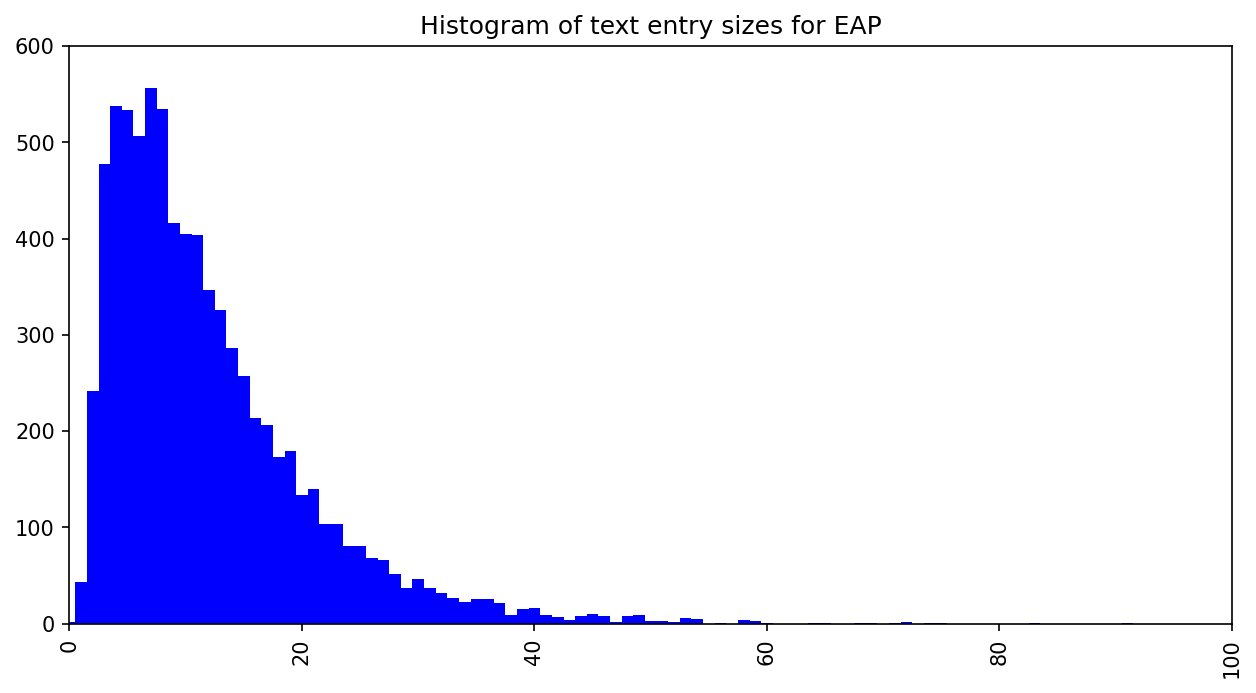

In [ ]:
plotTokensPerEntry(df_train, "cleanedText", "EAP")

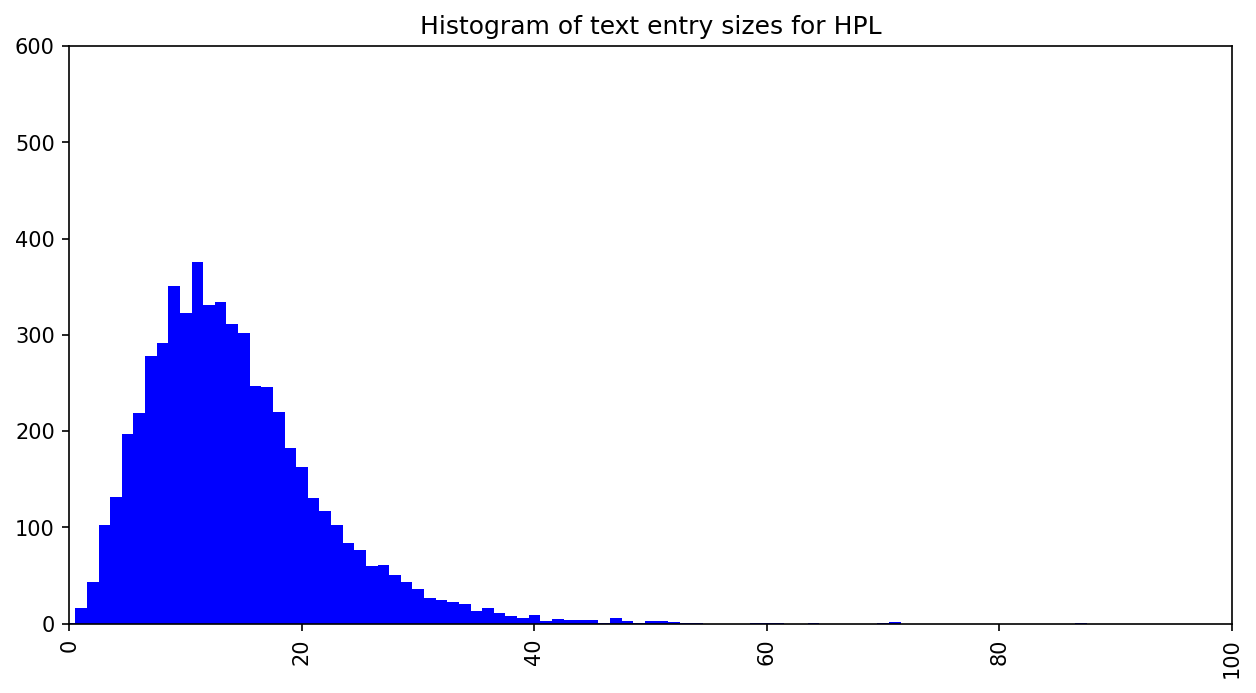

In [ ]:
plotTokensPerEntry(df_train, "cleanedText", "HPL")

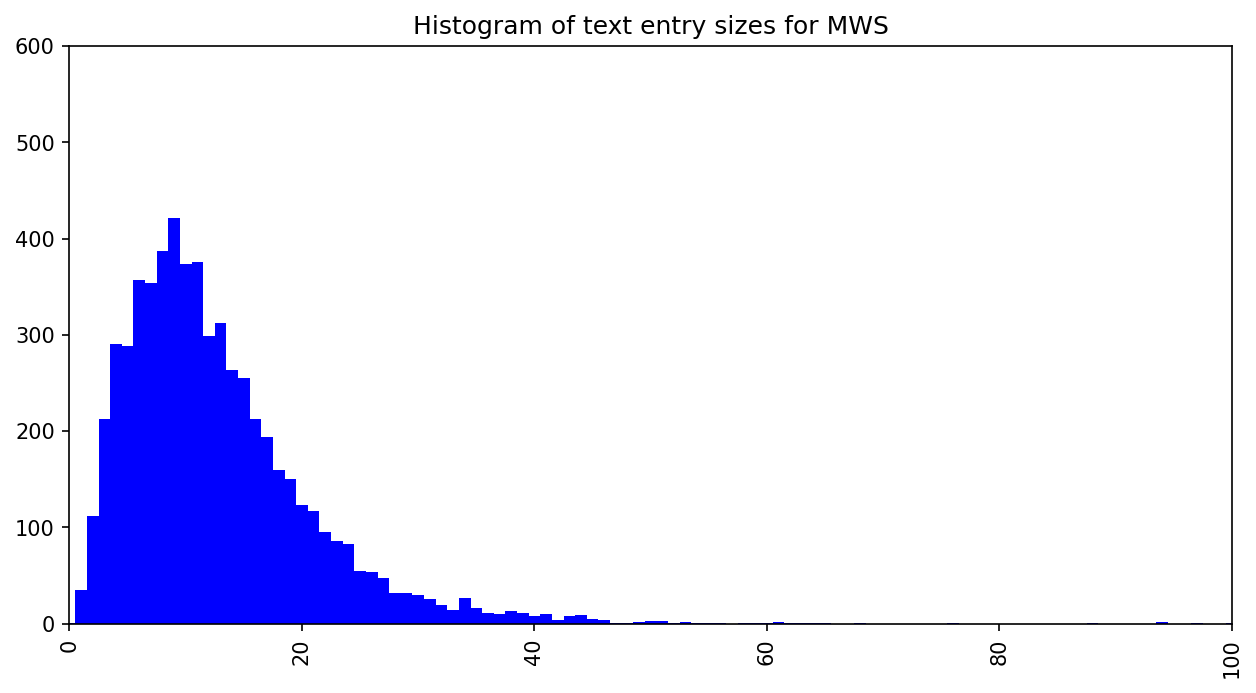

In [ ]:
plotTokensPerEntry(df_train, "cleanedText", "MWS")

##### Plotting N-Grams

Here we plot the top 30 bigrams and trigrams for each author to get an idea or some of their biggest n-grams.

In [ ]:
from nltk.util import ngrams

def getAuthorNgrams(df, author="EAP", n=1, dictSize = 10):
    ret = {}
    for i in df[df.author == author].cleanedText:
        unigrams = ngrams(i, n)
        for item in unigrams:
            if item not in ret.keys():
                ret[item] = 1
            else:
                ret[item] = ret[item] + 1
    # Sort the dictionary
    ret = dict(sorted(ret.items(), key=lambda item: item[1]))
    # Grab the top items
    topItems = {}
    for i in range(dictSize):
        currItem = ret.popitem()
        if n == 1:
            topItems[currItem[0][0]] = currItem[1]
        elif n == 2:
            topItems[currItem[0][0] + " " + currItem[0][1]] = currItem[1]
        elif n == 3:
            topItems[currItem[0][0] + " " + currItem[0][1] + " " + currItem[0][2]] = currItem[1]
    figure(figsize=(10,5), dpi=150)
    plt.xticks(rotation=90)
    plt.bar(topItems.keys(), topItems.values(), 1, color='b')
    plt.title("top " + str(dictSize) + " " + str(n) + "-gram frequency for author " + author)

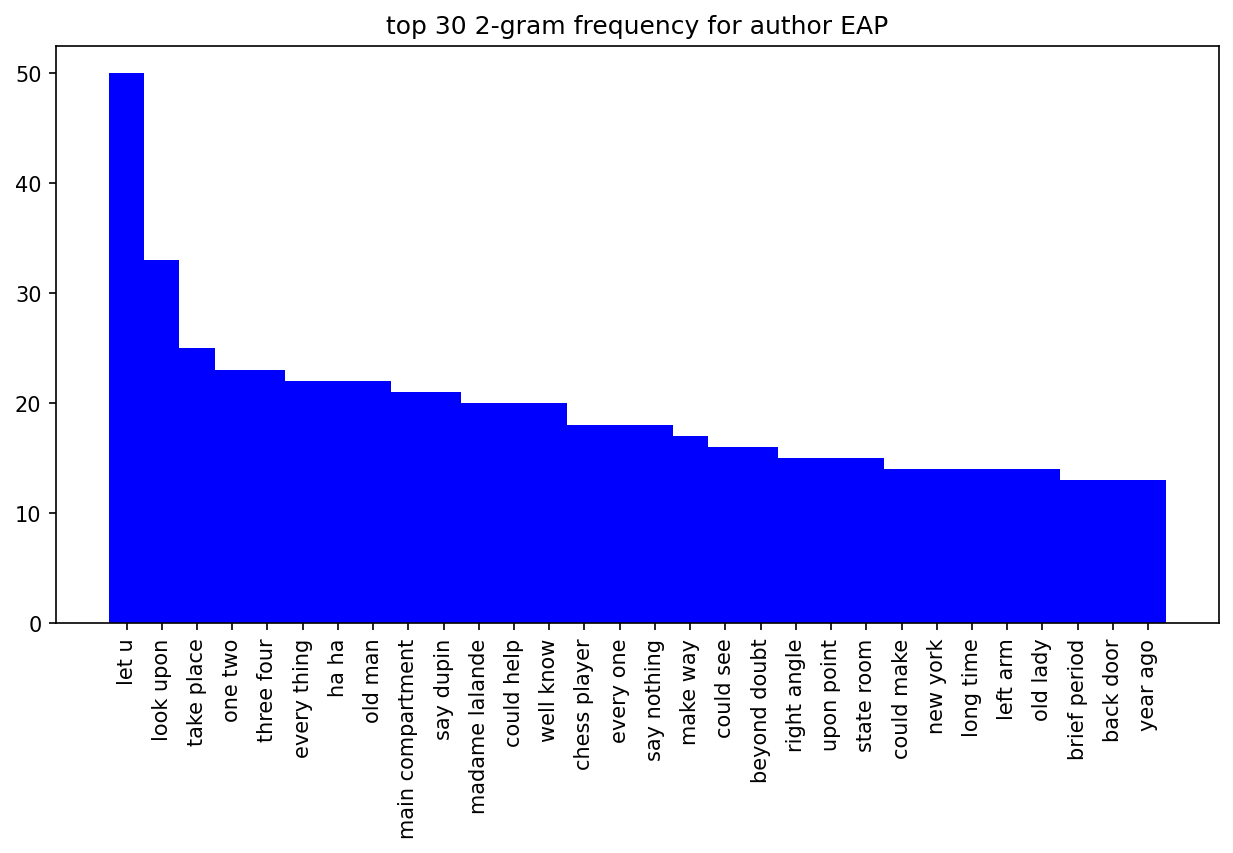

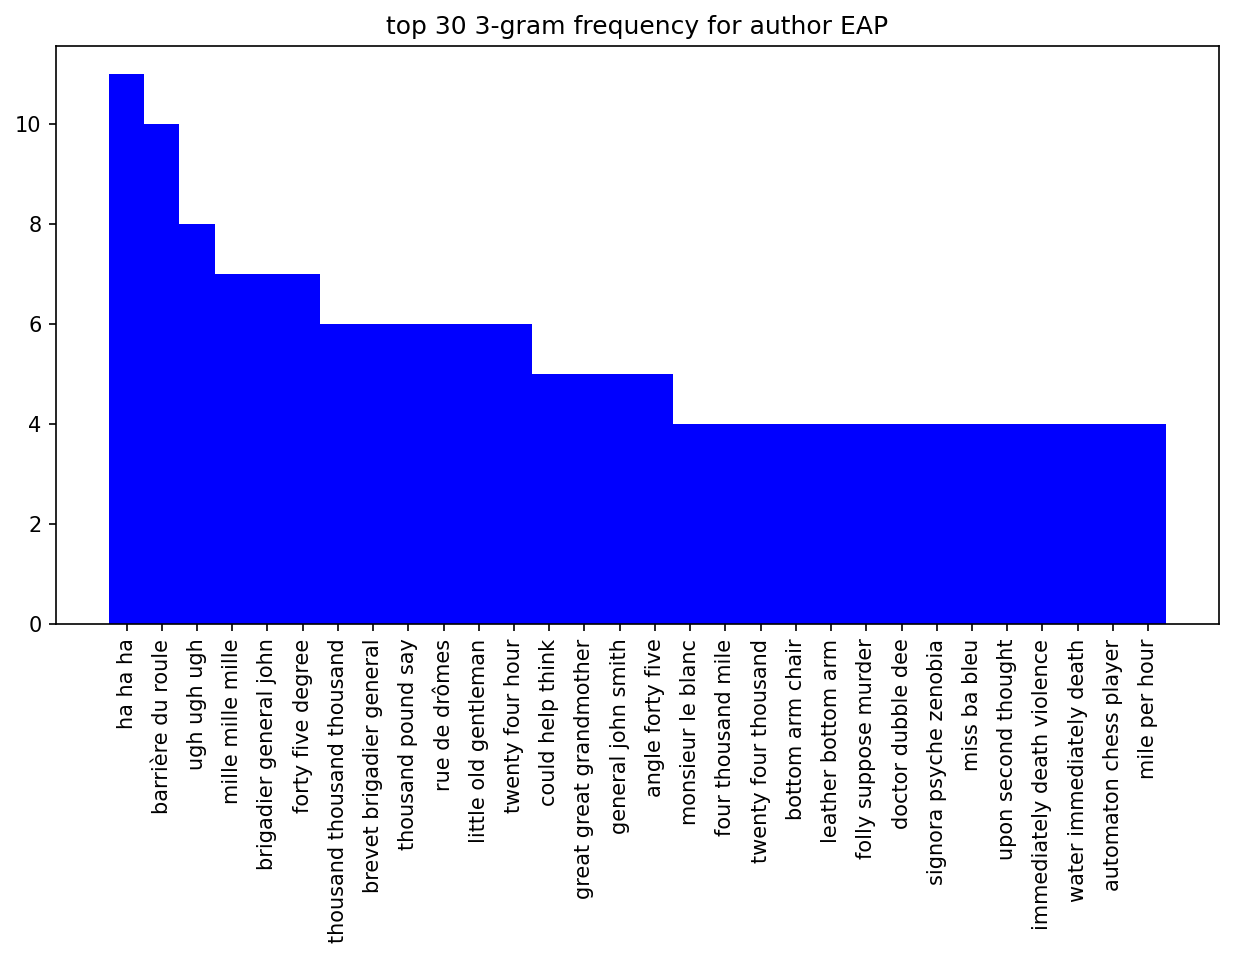

In [ ]:
getAuthorNgrams(df_train, "EAP", 2, 30)
getAuthorNgrams(df_train, "EAP", 3, 30)

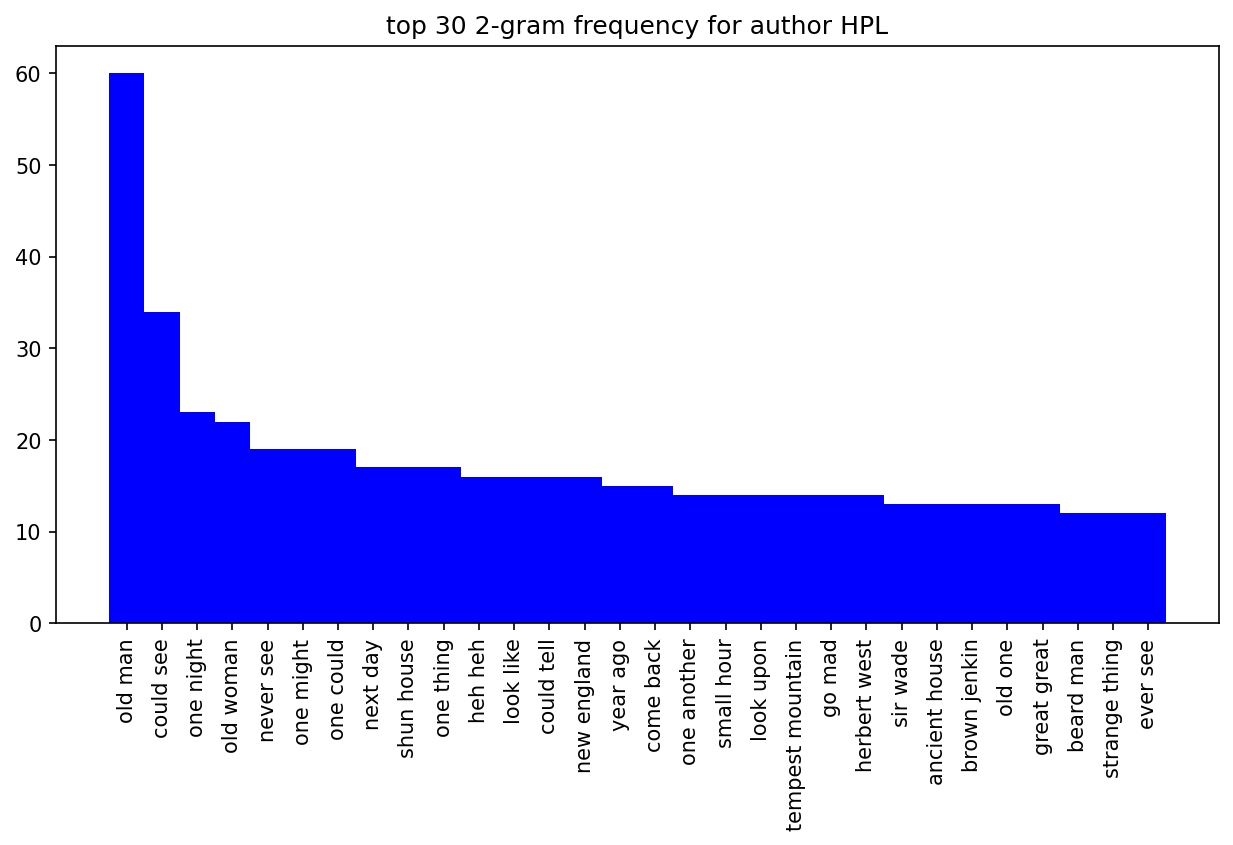

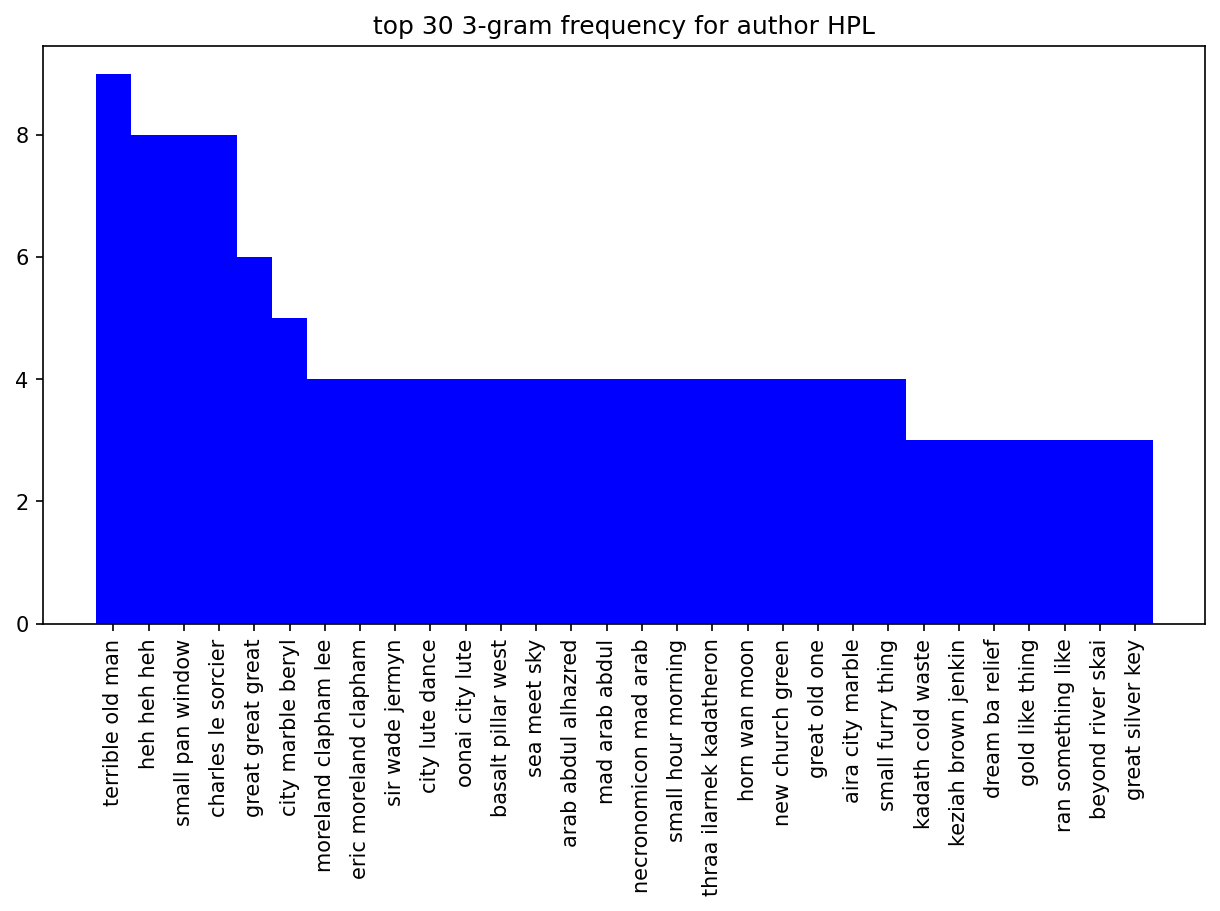

In [ ]:
getAuthorNgrams(df_train, "HPL", 2, 30)
getAuthorNgrams(df_train, "HPL", 3, 30)

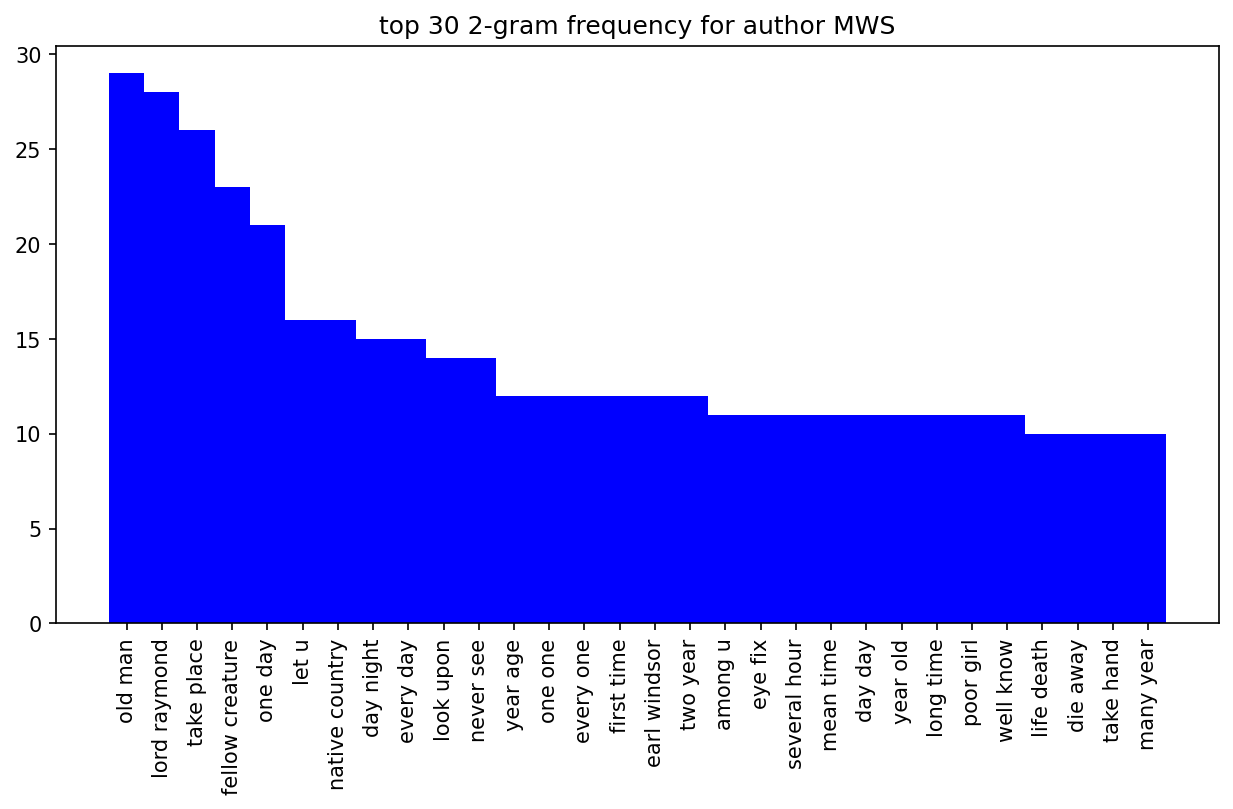

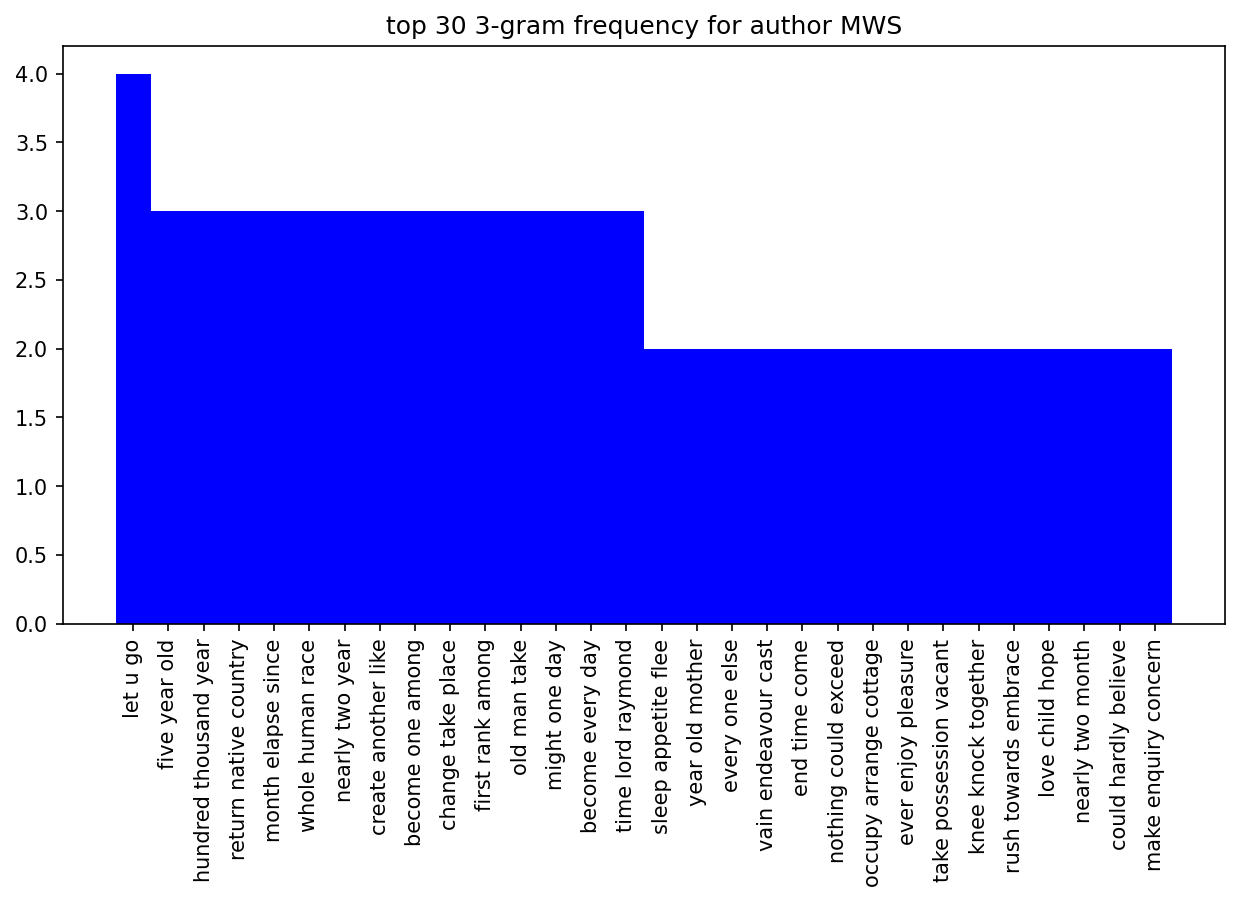

In [ ]:
getAuthorNgrams(df_train, "MWS", 2, 30)
getAuthorNgrams(df_train, "MWS", 3, 30)

##### Converting Back to Pure String

For ease of creating word vectors during topic modeling, the training data's cleaned text is set back from the nltk objects to pure text strings

In [ ]:
df_train['cleanedTextString'] = [' '.join(map(str, l)) for l in df_train['cleanedText']]
df_train['cleanedTextString'].head()

0    process however afford mean ascertain dimensio...
1                never occur fumble might mere mistake
2    left hand gold snuff box caper hill cut manner...
3    lovely spring look windsor terrace sixteen fer...
4    find nothing else even gold superintendent aba...
Name: cleanedTextString, dtype: object

##### Cleaning Training Data

In the above steps we iteratively performed NLP steps to the dataframe while appending the updates to new columns. This is nice while moving slowly and iteratively along the NLP pipeline, but the dataframe should be cleaned for readability's sake.

In [ ]:
trashColumns = ["textTokenized", "tokenizedLower", "tokenizedLowerAlpha", "tokenizedLowerAlphaLemma", "cleanedText"]
df_train.drop(trashColumns, axis=1, inplace=True)
df_train.head()

,id,text,author,cleanedTextString
0,id26305,"This process, however, afforded me no means of...",EAP,process however afford mean ascertain dimensio...
1,id17569,It never once occurred to me that the fumbling...,HPL,never occur fumble might mere mistake
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,left hand gold snuff box caper hill cut manner...
3,id27763,How lovely is spring As we looked from Windsor...,MWS,lovely spring look windsor terrace sixteen fer...
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,find nothing else even gold superintendent aba...


# 3. Topic Modeling with LDA and NMF

## LDA

The following cell initializes a count vectorizer for our bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the vectorizer and create our bag of words vocabulary
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(df_train['cleanedTextString'])

#Print the first ten feature names
for i in cv.get_feature_names_out()[:10]:
    print(i, end=" ")
dtm

aback abandon abandonment abaout abate abatement abbey abbreviation abdication abdul 

<19579x11718 sparse matrix of type '<class 'numpy.int64'>'
	with 207822 stored elements in Compressed Sparse Row format>

In [ ]:
# Display the first ten features from vectors (in alphabetical order)
words = cv.get_feature_names()
print(len(words), words[:10])

11718 ['aback', 'abandon', 'abandonment', 'abaout', 'abate', 'abatement', 'abbey', 'abbreviation', 'abdication', 'abdul']


/home/feeks/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Initialize and Fit LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=7, random_state=42)
LDA.fit(dtm)

Printing the LDA's topics with their top 15 words

In [ ]:
# Helper function to print the top n words of each feature of the lda
def printTopWords(lda, featureNames, nWords):
    for idx, topic in enumerate(lda.components_):
        print("Topic #", idx, end=": ")
        tempStr = " ".join([featureNames[i] for i in topic.argsort()[:-nWords - 1 :-1]])
        print(tempStr, end = '\n' + '-'*100 + '\n')

# Show the top 15 words of each topic for the LDA
numberWords = 15
printTopWords(LDA, cv.get_feature_names_out(), numberWords)


Topic # 0: say make word thought time point eye know long come night hand fact general matter
----------------------------------------------------------------------------------------------------
Topic # 1: man come thing old look earth sea great new day night felt strange people know
----------------------------------------------------------------------------------------------------
Topic # 2: house make room left old little door time street foot say come saw man turn
----------------------------------------------------------------------------------------------------
Topic # 3: great thing make like place form man idea time life water change sound fall scream
----------------------------------------------------------------------------------------------------
Topic # 4: eye light look window open door saw like tree hand sun face old wall come
----------------------------------------------------------------------------------------------------
Topic # 5: love day year life hope father tim

Adding LDA topic predictions to the data frame

In [ ]:
# Append the LDA topic values to the data frame
topicResults = LDA.transform(dtm)
df_train['topicLDA']=topicResults.argmax(axis=1)

df_train.head()

,id,text,author,textTokenized,tokenizedLower,tokenizedLowerAlpha,tokenizedLowerAlphaStops,cleanedText,cleanedTextString,topicLDA
0,id26305,"This process, however, afforded me no means of...",EAP,"[This, process, ,, however, ,, afforded, me, n...","[this, process, ,, however, ,, afforded, me, n...","[this, process, however, afforded, me, no, mea...","[process, however, afforded, means, ascertaini...","[process, however, afford, mean, ascertain, di...",process however afford mean ascertain dimensio...,0
1,id17569,It never once occurred to me that the fumbling...,HPL,"[It, never, once, occurred, to, me, that, the,...","[it, never, once, occurred, to, me, that, the,...","[it, never, once, occurred, to, me, that, the,...","[never, occurred, fumbling, might, mere, mistake]","[never, occur, fumble, might, mere, mistake]",never occur fumble might mere mistake,0
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[In, his, left, hand, was, a, gold, snuff, box...","[in, his, left, hand, was, a, gold, snuff, box...","[in, his, left, hand, was, a, gold, snuff, box...","[left, hand, gold, snuff, box, capered, hill, ...","[left, hand, gold, snuff, box, caper, hill, cu...",left hand gold snuff box caper hill cut manner...,2
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[How, lovely, is, spring, As, we, looked, from...","[how, lovely, is, spring, as, we, looked, from...","[how, lovely, is, spring, as, we, looked, from...","[lovely, spring, looked, windsor, terrace, six...","[lovely, spring, look, windsor, terrace, sixte...",lovely spring look windsor terrace sixteen fer...,4
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[Finding, nothing, else, ,, not, even, gold, ,...","[finding, nothing, else, ,, not, even, gold, ,...","[finding, nothing, else, not, even, gold, the,...","[finding, nothing, else, even, gold, superinte...","[find, nothing, else, even, gold, superintende...",find nothing else even gold superintendent aba...,3


## NMF

The following cells initialize and fit the TF-IDF vectorizer

In [ ]:
# Import TF-IDF Vectorizer using sci-kit learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer structure
v = TfidfVectorizer(min_df = 2, max_df = 0.95, stop_words='english')

# Break flow of execution of the structure is not properly initialized
assert(v)
v

TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [ ]:
# Fit the TF-IDF vectorizer on the training text
dtm = v.fit_transform(df_train['cleanedTextString'])
dtm

<19579x11719 sparse matrix of type '<class 'numpy.float64'>'
	with 207793 stored elements in Compressed Sparse Row format>

##### NMF Initialize and Fit

In [ ]:
# Import scikit-learn Non-negative Matrix Factorization
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=21, random_state=42, max_iter=400)
nmf_model.fit(dtm)

NMF(max_iter=400, n_components=21, random_state=42)

Illustrate the NMF topics with their top 15 words

In [ ]:
def printTopicsNMF(nmf, vectorizer, numWords):
    for idx, topic in enumerate(nmf.components_):
        print("Topic #", idx, end=": ")
        print([v.get_feature_names_out()[i] for i in topic.argsort()[-numWords:]], end="\n"+"-"*100+"\n")

printTopicsNMF(nmf_model, v, 15)

Topic # 0: ['matter', 'raymond', 'moment', 'space', 'spent', 'friend', 'think', 'lose', 'return', 'short', 'place', 'mean', 'hour', 'long', 'time']
----------------------------------------------------------------------------------------------------
Topic # 1: ['question', 'course', 'thousand', 'captain', 'friend', 'general', 'matter', 'raymond', 'dear', 'yes', 'quite', 'mean', 'sir', 'dupin', 'say']
----------------------------------------------------------------------------------------------------
Topic # 2: ['earth', 'morning', 'street', 'moon', 'light', 'away', 'knew', 'home', 'people', 'tell', 'change', 'sound', 'fear', 'men', 'come']
----------------------------------------------------------------------------------------------------
Topic # 3: ['fact', 'reply', 'matter', 'friend', 'young', 'expect', 'knew', 'mean', 'believe', 'strange', 'place', 'god', 'tell', 'world', 'know']
----------------------------------------------------------------------------------------------------
Topi

Transform the topics and append them to the training data

In [ ]:
transformed_topics = nmf_model.transform(dtm)
label = transformed_topics.argmax(axis = 1)

# Break if our nmf topic labels differ from the data frame size
assert(df_train.shape[0] == len(label))

In [ ]:
df_train['TopicNMF'] = label
df_train.head()

,id,text,author,textTokenized,tokenizedLower,tokenizedLowerAlpha,tokenizedLowerAlphaStops,cleanedText,cleanedTextString,topicLDA,TopicNMF
0,id26305,"This process, however, afforded me no means of...",EAP,"[This, process, ,, however, ,, afforded, me, n...","[this, process, ,, however, ,, afforded, me, n...","[this, process, however, afforded, me, no, mea...","[process, however, afforded, means, ascertaini...","[process, however, afford, mean, ascertain, di...",process however afford mean ascertain dimensio...,0,6
1,id17569,It never once occurred to me that the fumbling...,HPL,"[It, never, once, occurred, to, me, that, the,...","[it, never, once, occurred, to, me, that, the,...","[it, never, once, occurred, to, me, that, the,...","[never, occurred, fumbling, might, mere, mistake]","[never, occur, fumble, might, mere, mistake]",never occur fumble might mere mistake,0,18
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[In, his, left, hand, was, a, gold, snuff, box...","[in, his, left, hand, was, a, gold, snuff, box...","[in, his, left, hand, was, a, gold, snuff, box...","[left, hand, gold, snuff, box, capered, hill, ...","[left, hand, gold, snuff, box, caper, hill, cu...",left hand gold snuff box caper hill cut manner...,2,10
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[How, lovely, is, spring, As, we, looked, from...","[how, lovely, is, spring, as, we, looked, from...","[how, lovely, is, spring, as, we, looked, from...","[lovely, spring, looked, windsor, terrace, six...","[lovely, spring, look, windsor, terrace, sixte...",lovely spring look windsor terrace sixteen fer...,4,13
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[Finding, nothing, else, ,, not, even, gold, ,...","[finding, nothing, else, ,, not, even, gold, ,...","[finding, nothing, else, not, even, gold, the,...","[finding, nothing, else, even, gold, superinte...","[find, nothing, else, even, gold, superintende...",find nothing else even gold superintendent aba...,3,13


### Plotting Topics by Author

In [ ]:
def plotNmfTopicFrequencies(author = "EAP"):
    topicFrequencies = {}
    for i in df_train[df_train.author == author].TopicNMF:
        if i not in topicFrequencies.keys():
            topicFrequencies[i] = 1
        else:
            topicFrequencies[i] = topicFrequencies[i] + 1
    figure(figsize=(10,3), dpi=150)
    plt.xticks(rotation=90)
    plt.bar(topicFrequencies.keys(), topicFrequencies.values(), color='b')
    plt.title(author + " nmf topic frequency distribution")
    plt.ylim(0, 1200)

In [ ]:
def plotLdaTopicFrequencies(author = "EAP"):
    topicFrequencies = {}
    for i in df_train[df_train.author == author].topicLDA:
        if i not in topicFrequencies.keys():
            topicFrequencies[i] = 1
        else:
            topicFrequencies[i] = topicFrequencies[i] + 1
    figure(figsize=(10,3), dpi=150)
    plt.xticks(rotation=90)
    plt.bar(topicFrequencies.keys(), topicFrequencies.values(), color='r')
    plt.title(author + " lda topic frequency distribution")
    plt.ylim(0, 2000)

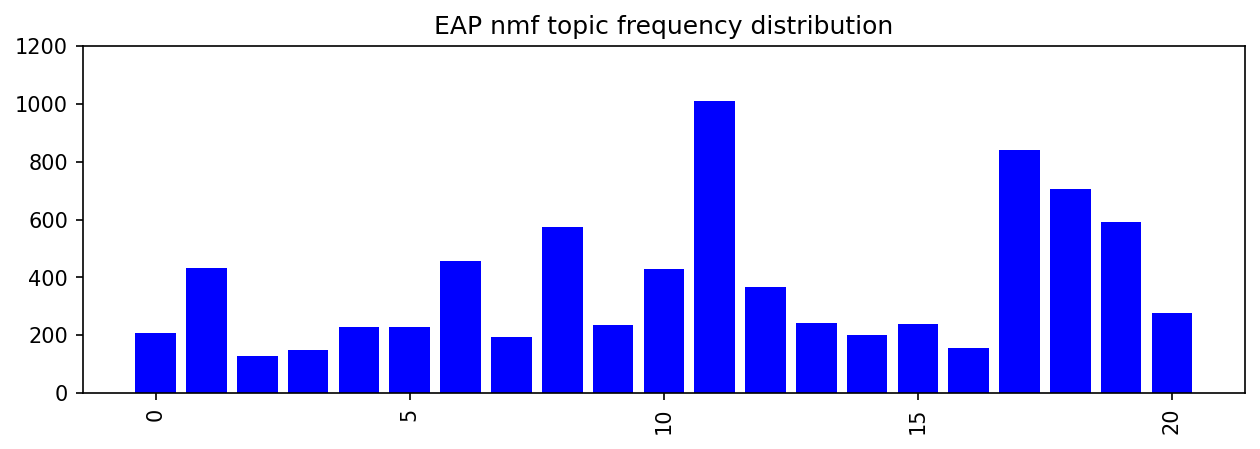

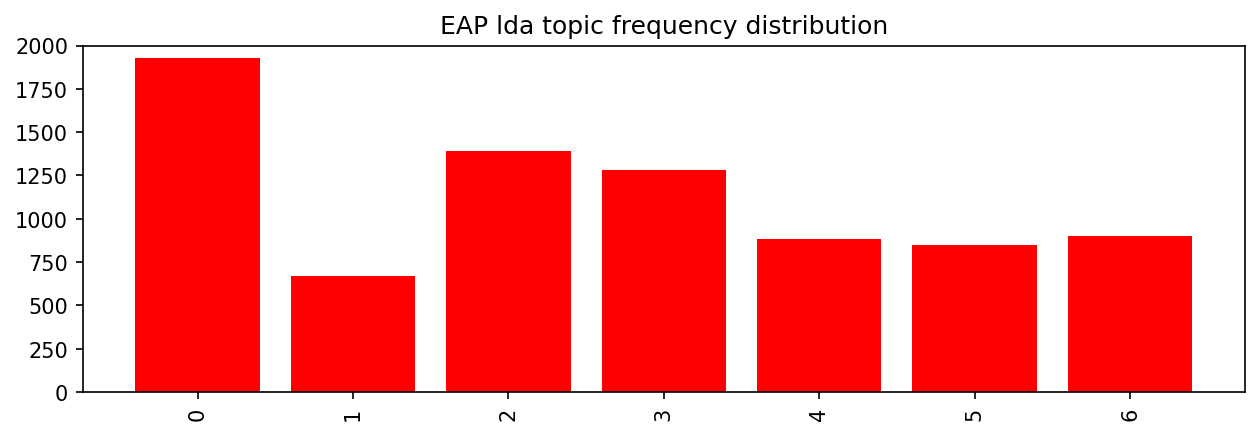

In [ ]:
plotNmfTopicFrequencies("EAP")
plotLdaTopicFrequencies("EAP")

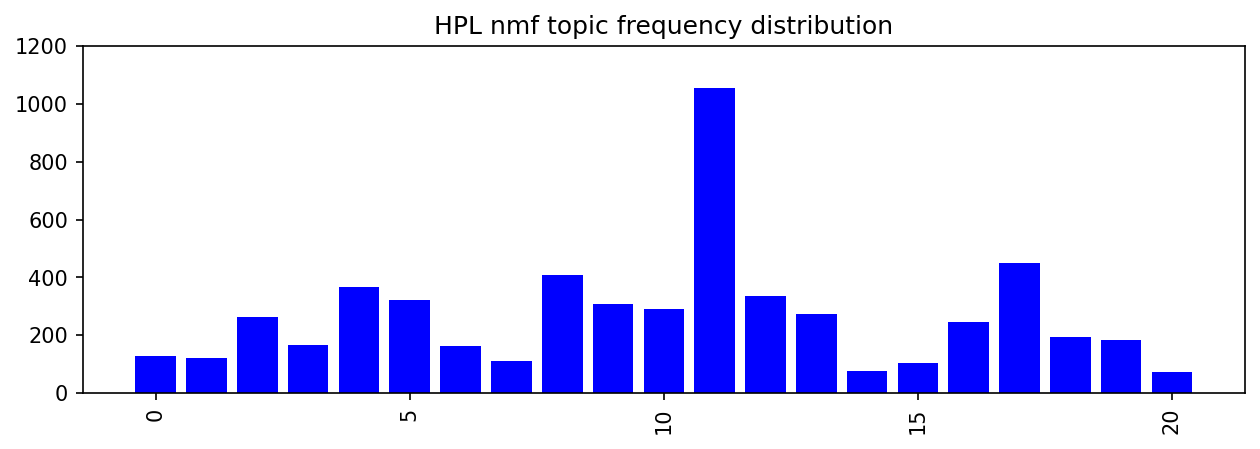

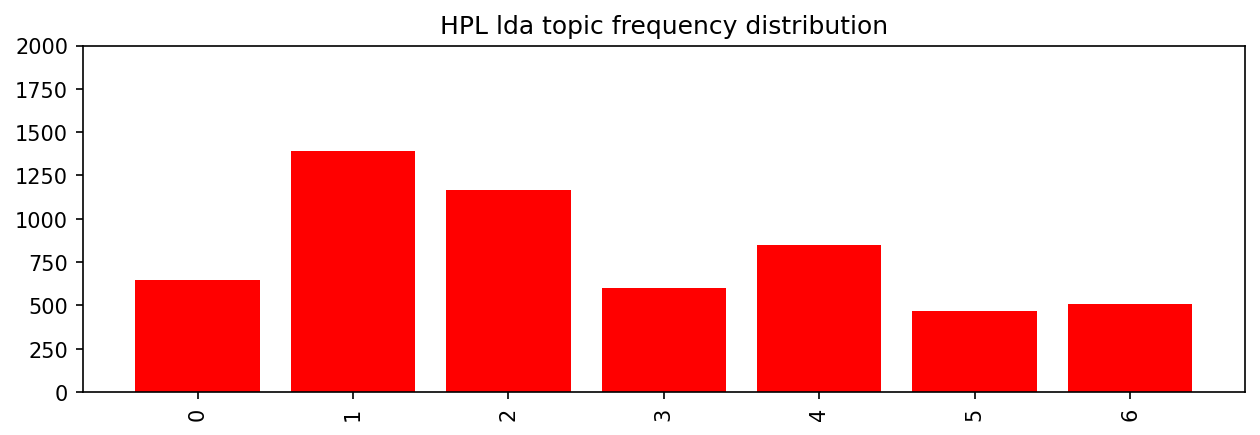

In [ ]:
plotNmfTopicFrequencies("HPL")
plotLdaTopicFrequencies("HPL")

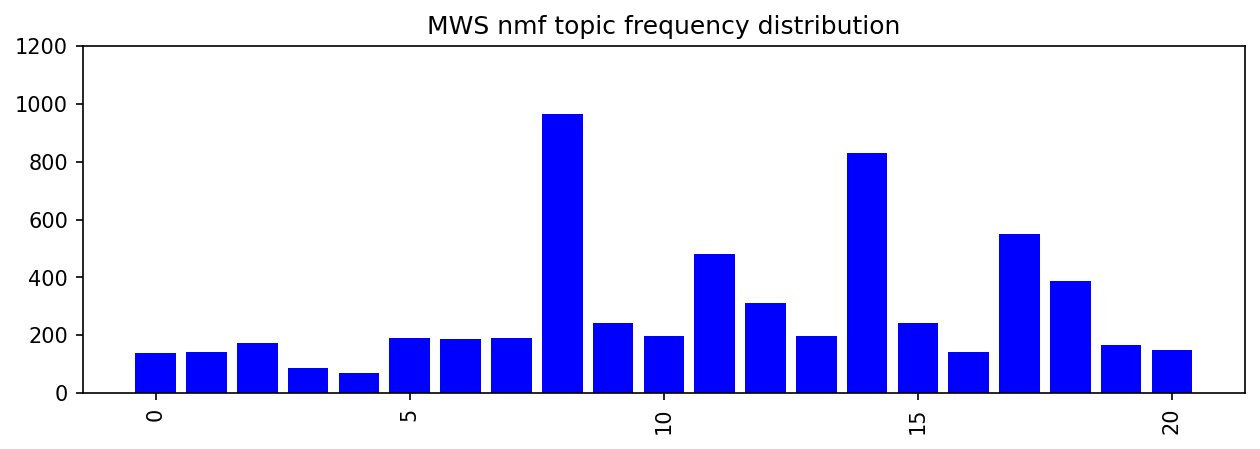

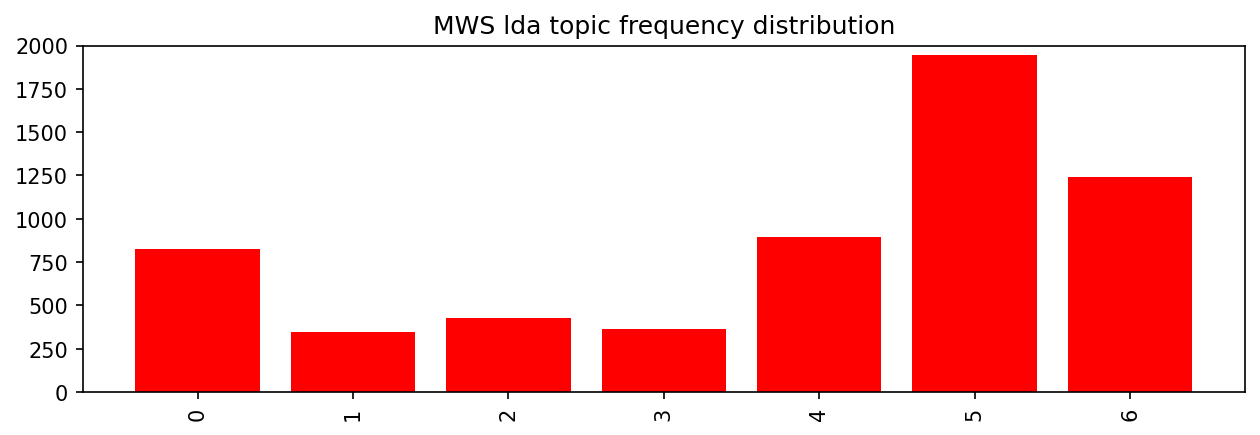

In [ ]:
plotNmfTopicFrequencies("MWS")
plotLdaTopicFrequencies("MWS")